<a href="https://colab.research.google.com/github/MehwishSameer/LetsGrowMore/blob/main/Stock_Market_Prediction_And_Forecasting_Using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The approach used here will only work on the dataset with the same size as the dataset used here.
If you want to use it on any other dataset then you need to changes values and step accordingly.

**1.   Collect the stock data**

In [66]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

Stock data from 2010 to 2018

In [67]:
df=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [68]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [88]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


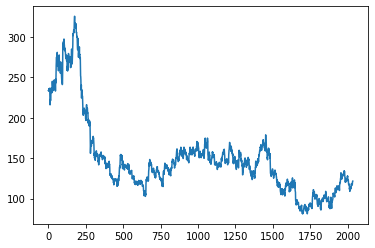

In [69]:
close= df.reset_index()['Close']
plt.plot(close)

In [70]:
scaler=MinMaxScaler(feature_range=(0,1))
close=scaler.fit_transform(np.array(close).reshape(-1,1))

Time Series data should be divided according to date in order. Because each date result depends on previous date. Foreg: day1, day2, day3 |break| day4, day5

This ordered data is divided not random days as each day result depends on the previous one.

Timesteps=3
Foreg: Data: (120,130,125,140,134,150)Train Data    

(160,190,154,160,170)Test Data


----X_Train---  Y_Train--------------------Y_Train val1  val2  val3  o/p(Y_test)
                                            
                                         
val1  val2  val3  o/p------------------------------------160 190 154 160

120 130 125 140-------------------------------------190 154 160 170

130 125 140 134

125 140 134 150

In the table 1 y_train will be trained and then in table 2 Y_Train column will do predictions which will be compared with output(y_test) and it will show how good results was.


**2.  Preprocess the data- train and test**

In [71]:
train_size=int(len(close)*0.65)
test_size=len(close)-train_size
train_data,test_data=close[0:train_size,:],close[train_size:len(close),:1]

In [72]:
def create(data, n=1):
	X, Y = [], []
	for i in range(len(data)-n-1):
		df = data[i:(i+n), 0]  
		X.append(df)
		Y.append(data[i + n, 0])
	return np.array(X), np.array(Y)

In [73]:
time_step = 53
X_train, y_train = create(train_data, time_step)
X_test, ytest = create(test_data, time_step)

In [74]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1) 

**3.  Create an stacked LSTM model**

In [75]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(53,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [76]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 53, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 53, 50)            20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=53,batch_size=64,verbose=1)

Epoch 1/53
20/20 [==============================] - 10s 193ms/step - loss: 0.0449 - val_loss: 0.0031
Epoch 2/53
20/20 [==============================] - 2s 123ms/step - loss: 0.0048 - val_loss: 0.0014
Epoch 3/53
20/20 [==============================] - 2s 125ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 4/53
20/20 [==============================] - 3s 132ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 5/53
20/20 [==============================] - 3s 128ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 6/53
20/20 [==============================] - 3s 128ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 7/53
20/20 [==============================] - 3s 131ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 8/53
20/20 [==============================] - 3s 137ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 9/53
20/20 [==============================] - 4s 175ms/step - loss: 0.0014 - val_loss: 9.4311e-04
Epoch 10/53
20/20 [==============================] - 3s 128ms/step - loss: 0.0014 - val_loss: 9

In [78]:
train_p=model.predict(X_train)
test_p=model.predict(X_test)

In [79]:
train_p=scaler.inverse_transform(train_p)
test_p=scaler.inverse_transform(test_p)

In [80]:
math.sqrt(mean_squared_error(y_train,train_p))
math.sqrt(mean_squared_error(ytest,test_p))

117.57138534838063

**4.   Predict the test data and plot the output**

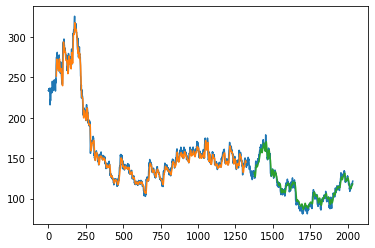

In [81]:
step=53
train_Plot = np.empty_like(close)
train_Plot[:, :] = np.nan
train_Plot[step:len(train_p)+step, :] = train_p
test_Plot = np.empty_like(close)
test_Plot[:, :] = np.nan
test_Plot[len(train_p)+(step*2)+1:len(close)-1, :] = test_p
plt.plot(scaler.inverse_transform(close))
plt.plot(train_Plot)
plt.plot(test_Plot)
plt.show()

**5.   Predict the future 30 days and plot the output**

In [82]:
x_input=test_data[660:].reshape(1,-1)
x_input.shape

(1, 53)

In [83]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [84]:
output=[]
n1=53
i=0
while(i<30):
    
    if(len(temp_input)>53):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n1, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n1,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        output.extend(yhat.tolist())
        i=i+1
    

print(output)

[0.1556392]
54
1 day input [0.17381536 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131
 0.17401961 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065
 0.17279412 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222
 0.17238562 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405
 0.1503268  0.15196078 0.14726307 0.14501634 0.14603758 0.12479575
 0.13112745 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497
 0.13459967 0.12806373 0.13031046 0.12724673 0.13521242 0.14522059
 0.15257353 0.14848856 0.14338235 0.14562908 0.15236928 0.15400327
 0.14971405 0.1621732  0.16319444 0.16584967 0.1556392 ]
1 day output [[0.15717243]]
2 day input [0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.113

In [85]:
day_new=np.arange(1,54)
day_pred=np.arange(54,84)

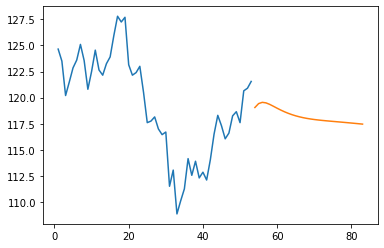

In [89]:
plt.plot(day_new,scaler.inverse_transform(close[1982:]))
plt.plot(day_pred,scaler.inverse_transform(output))

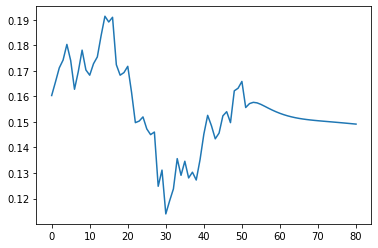

In [90]:
close_ex=close.tolist()
close_ex.extend(output)
plt.plot(close_ex[1984:])

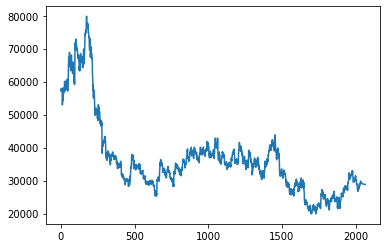

In [92]:
close_ex=scaler.inverse_transform(close_ex).tolist()
plt.plot(close_ex)